## Activation functions

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import components.activations as act

In [8]:
def plot_activation(fn):
    x = np.array([x / 10.0 for x in range(-50,50)]) # from -10 to 10 with 100 steps
    y = np.array([fn(n) for n in x])
    plt.plot(x, y)

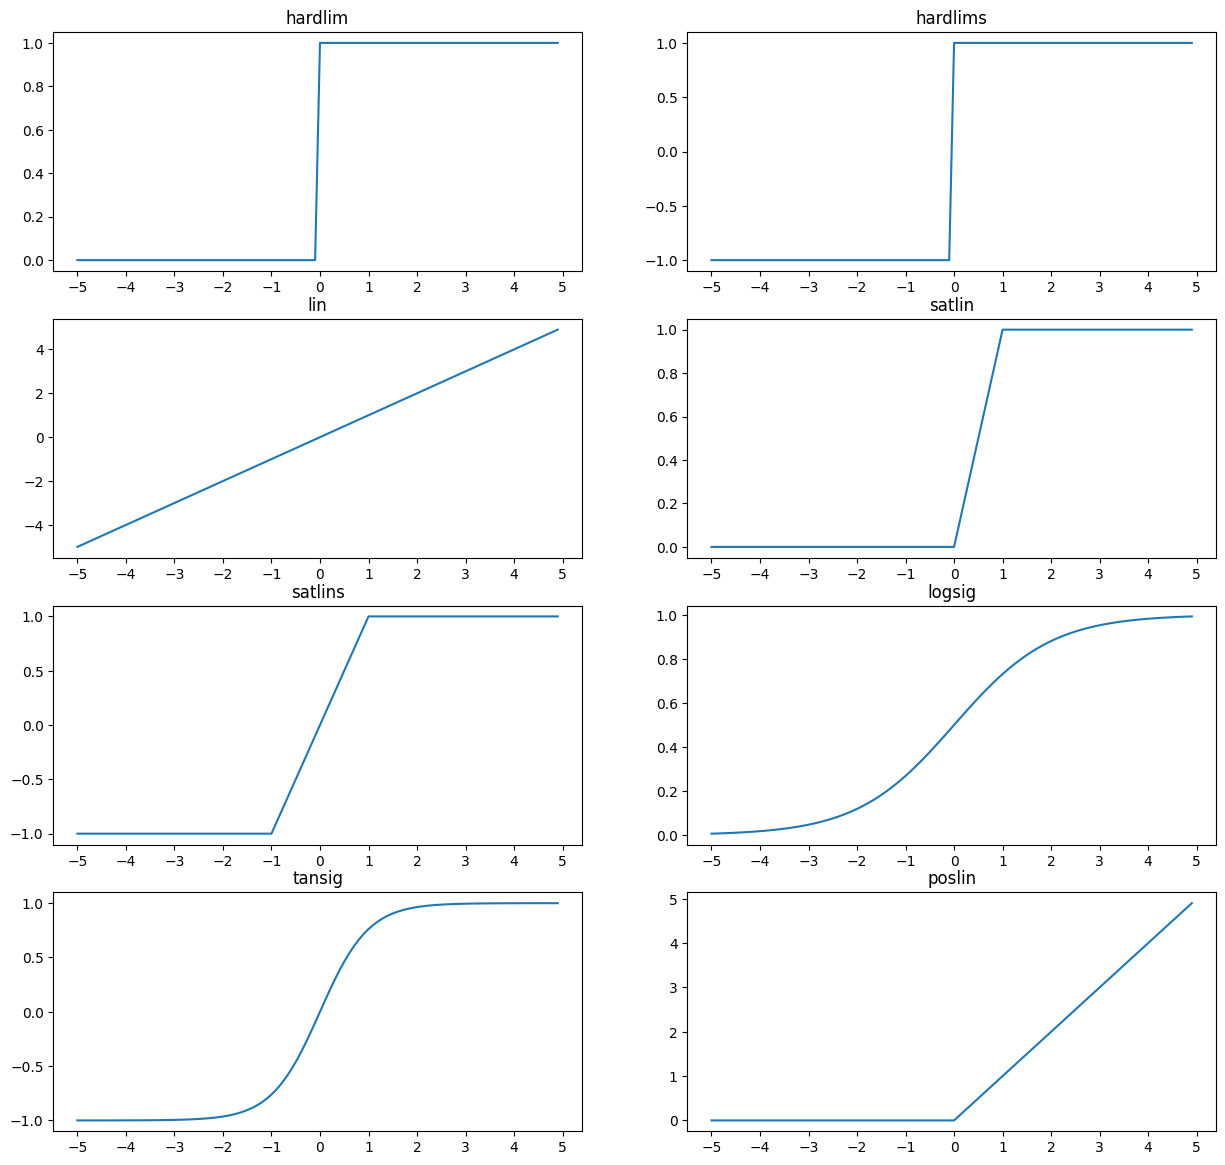

In [9]:
plt.figure(figsize=(15, 18))

plotIdx = 1
for name, val in act.__dict__.items():
    if callable(val) and name != "exp":
        ax = plt.subplot(5, 2, plotIdx)
        plt.title(name)
        plt.xticks(range(-5,6))
        plot_activation(val)
        plotIdx += 1
plt.show()

## Neurons

In [2]:
from components.neurons import Neuron, Delay
from components.activations import poslin

In [3]:
neuron = Neuron(2, poslin, 0)
neuron.set_weights([1,2])

print(neuron.get_weights())
print(neuron.activate([2, 2]))

[1. 2.]
6.0


In [5]:
delay = Delay(2, poslin, 0)
delay.set_weights([1, 2])

for i in range(2):
    print("a" + str(i),": ", str(delay.activate([1, 2])) )

a0 :  [1. 2.]
a1 :  5.0


## Layer

In [1]:
from components.neurons import Neuron, Delay
from components.layer import Layer
from components.activations import poslin

In [3]:
neuron1 = Neuron(2, poslin, 0)
neuron1.set_weights([1,2])

neuron2 = Neuron(2, poslin, 1)
neuron2.set_weights([1,2])

layer = Layer([neuron1, neuron2])

layer.activate([2,2])

[6.0, 7.0]

## First Neural Networks

In [11]:
from components.layer import Layer
from components.neurons import Neuron, Delay
from components.activations import hardlims, poslin, lin, satlins

In [2]:
# Prototypes
p1 = [1, -1, -1] # orange
p2 = [1, 1, -1] # apple

### Perceptron

p = [shape, texture, weight]

Prototypes:
- p1 = [1, -1, -,1] # orange
- p2 = [1,  1, -,1] # apple

In [3]:
perceptron = Neuron(3, hardlims, 0)
perceptron.set_weights([0, 1, 0])

In [4]:
clas1 = perceptron.activate(p1)
clas2 = perceptron.activate(p2)

print("p1: ",  clas1)
print("p2: ",  clas2)

p1:  -1
p2:  1


### Hamming Network

In [5]:
feedfoward = Layer([])
feedfoward.set_weights([p1, p2])
feedfoward.set_biases([3,3])
feedfoward.set_activations([lin, lin])


recurrent = Layer([])
recurrent.set_weights([[1, -0.95], [-0.95, 1]])   
recurrent.set_biases([0, 0])
recurrent.set_activations([poslin, poslin])

In [6]:
out1 = feedfoward.activate([7, -1, -98])
out1

[109.0, 107.0]

In [7]:
out2 = out1
limit = 10

while(0 not in out2 and limit > 0):
    out2 = recurrent.activate(out2)
    limit -= 1

out2

[4.072500000000004, 0]

### Hopfield

In [12]:
layer = Layer([])
layer.set_weights([[0.2, 0, 0], [0, 1.2, 0], [0, 0, 0.2]])
layer.set_biases([0.9, 0, -0.9])
layer.set_activations([satlins, satlins, satlins])

In [13]:
limit = 10
inp = [-1, -1, -1]
old = [0, 0,  0]
out = layer.activate(inp)

while out != old and limit > 0:
    old = out
    out = layer.activate(out)
    limit -= 1

out

[1, -1, -1]